# Question 1

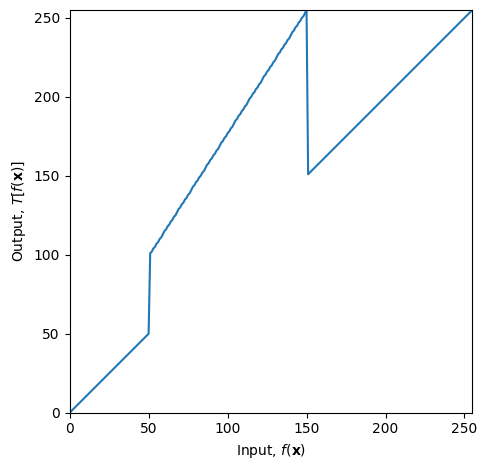

In [21]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

t1 = np.linspace(0,50,51).astype('uint8')   # 0,50,101
t2 = np.linspace(51,100,0).astype('uint8')   #51,200,50
t3 = np.linspace(101,255,100).astype('uint8')   #201,255,105
t4 = np.linspace(255,150,0).astype('uint8')   # 0,50,101
t5 = np.linspace(151,255,105).astype('uint8')   #51,200,50

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
transform = np.concatenate((transform, t4), axis=0).astype('uint8')
transform = np.concatenate((transform, t5), axis=0).astype('uint8')
#print(len(transform))

fig, ax = plt.subplots(1)
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel(r'Output, $T[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.tight_layout()
plt.show()
img_orig = cv.imread('emma.jpg', cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img_orig)
cv.waitKey(0)

image_transformed = cv.LUT(img_orig, transform)
cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

# Question 2

256


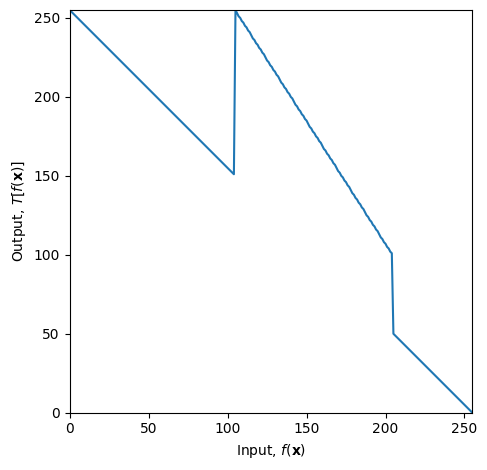

In [22]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

t1 = np.linspace(0,50,51).astype('uint8')   # 0,50,101
t2 = np.linspace(51,100,0).astype('uint8')   #51,200,50
t3 = np.linspace(101,255,100).astype('uint8')   #201,255,105
t4 = np.linspace(255,150,0).astype('uint8')   # 0,50,101
t5 = np.linspace(151,255,105).astype('uint8')   #51,200,50



transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
transform = np.concatenate((transform, t4), axis=0).astype('uint8')
transform = np.concatenate((transform, t5), axis=0).astype('uint8')

transform=np.flip(transform)        #flipping the intensity map array of ealier to get negative. 
print(len(transform))



fig, ax = plt.subplots(1)
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel(r'Output, $T[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.tight_layout()



img_orig = cv.imread('BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img_orig)
cv.waitKey(0)


image_transformed = cv.LUT(img_orig, transform)
cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()
plt.show()

# Question 3

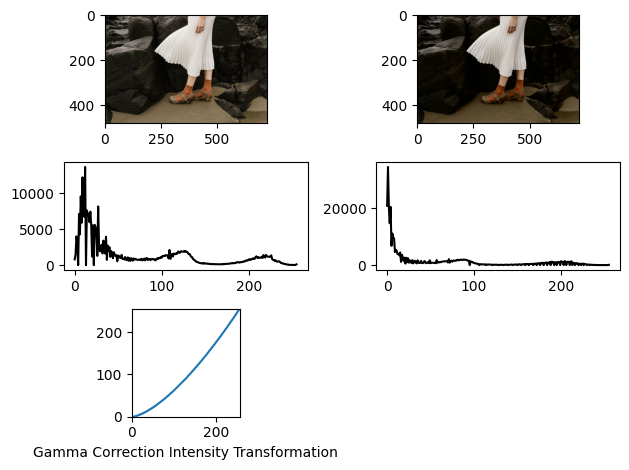

In [24]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Load the original image
img_orig = cv.imread('highlights_and_shadows.jpg', cv.IMREAD_COLOR)


img_lab = cv.cvtColor(img_orig, cv.COLOR_BGR2LAB)   # Convert the image to LAB color space
L_channel = img_lab[:, :, 0]  # Extract the L channel

# gamma correction to the L channel
gamma = 1.5 #possible value make image looking good.
table = np.array([(i/255.0)**gamma*255.0 for i in np.arange(0, 256)]).astype('uint8')
L_channel_gamma = cv.LUT(L_channel, table)

img_lab_gamma = img_lab.copy()          # Replace the gamma corrected L channel in the LAB image
img_lab_gamma[:, :, 0] = L_channel_gamma

# Convert the LAB image with gamma corrected L channel back to RGB
img_gamma = cv.cvtColor(img_lab_gamma, cv.COLOR_LAB2BGR) 
img_gamma = cv.cvtColor(img_gamma, cv.COLOR_BGR2RGB)


f, axarr = plt.subplots(3, 2)
axarr[0, 0].imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
axarr[0, 1].imshow(img_gamma)
hist_orig = cv.calcHist([L_channel], [0], None, [256], [0, 256]) # Plot histograms for L channel
axarr[1, 0].plot(hist_orig, color='k')
hist_gamma = cv.calcHist([L_channel_gamma], [0], None, [256], [0, 256])
axarr[1, 1].plot(hist_gamma, color='k')



# Plot the gamma correction table
axarr[2, 0].plot(table)
axarr[2, 0].set_xlabel("Gamma Correction Intensity Transformation")
axarr[2, 0].set_xlim(0, 255)
axarr[2, 0].set_ylim(0, 255)
axarr[2, 0].set_aspect('equal')

axarr[2, 1].axis('off')

# Show the plots
plt.tight_layout()
plt.show()


# Question 4

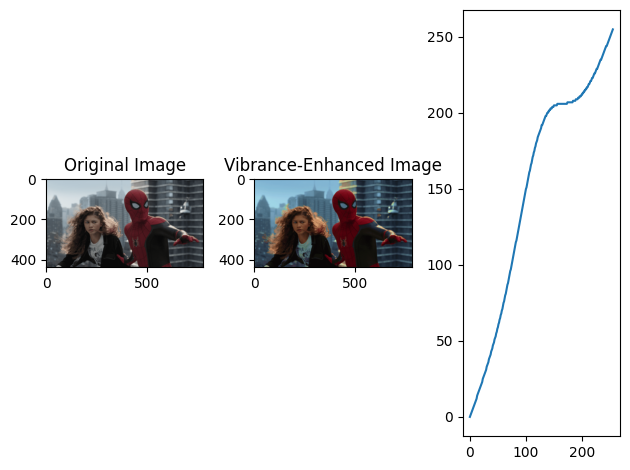

In [54]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv.imread('spider.png')


hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV) #BGR to HSV
hue, saturation, value = cv.split(hsv_image) # Split the HSV image into separate channels
a = 0.5
sigma=40
func=saturation+a*128*np.exp(-((saturation-128)**2)/(2*((sigma)**2)))
transform=np.minimum(func,255).astype('uint8')   # intensity transformation
enhanced_hsv_image = cv.merge((hue, transform, value))        # Combine the transformed saturation channel with hue and value
enhanced_image = cv.cvtColor(enhanced_hsv_image, cv.COLOR_HSV2BGR)

#to display in plot
input = np.arange(256)
output= np.minimum(input+a*128*np.exp(-((input-128)**2)/(2*(sigma)**2)),255).astype('uint8') #plot tansform

# Plot the images
f,ax=plt.subplots(1,3)
original=cv.cvtColor(image, cv.COLOR_BGR2RGB)
ax[0].imshow(original)
ax[0].set_title('Original Image')
enhanced_image = cv.cvtColor(enhanced_image, cv.COLOR_BGR2RGB) 
ax[1].imshow(enhanced_image)
ax[1].set_title('Vibrance-Enhanced Image')
ax[2].plot(input,output)
plt.tight_layout()
plt.show()


# Question 5

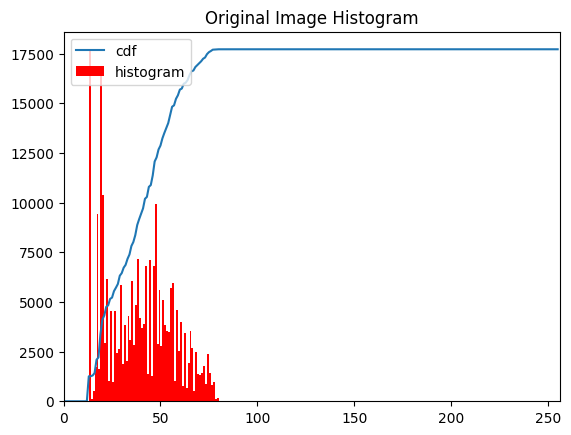

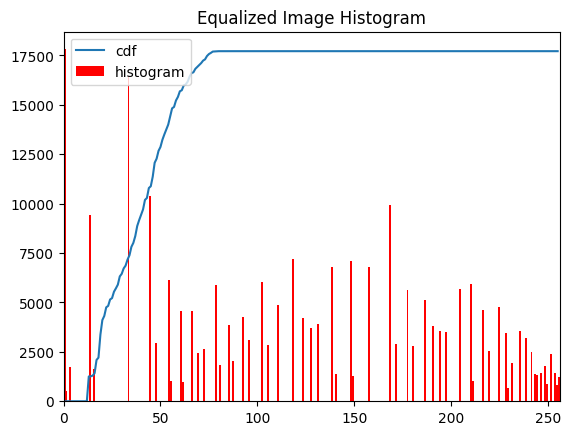

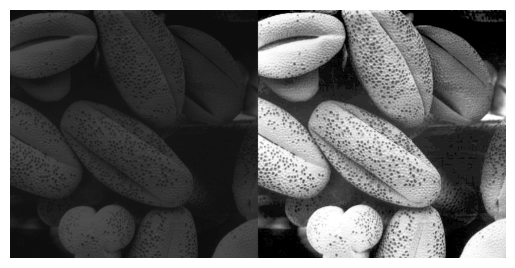

In [84]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('shells.tif', cv.IMREAD_GRAYSCALE)


# defining a function for histogram equalization
def histo_normalized(image):
    hist, bins = np.histogram(image.ravel(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    equ = cv.equalizeHist(image)
    return cdf_normalized,equ
#apply hist equlize
cdf_normalized,equalize=histo_normalized(img)

# Plot cdf and histogram of the original img
plt.plot(cdf_normalized)
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.title('Original Image Histogram')
plt.show()
# Plot cdf and histogram of the equalized img
plt.plot(cdf_normalized)
plt.hist(equalize.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.title('Equalized Image Histogram')
plt.show()

# Display original,equalized
res = np.hstack((img, equalize))
plt.axis('off')
plt.imshow(res, cmap='gray')
plt.show()


# Question 6

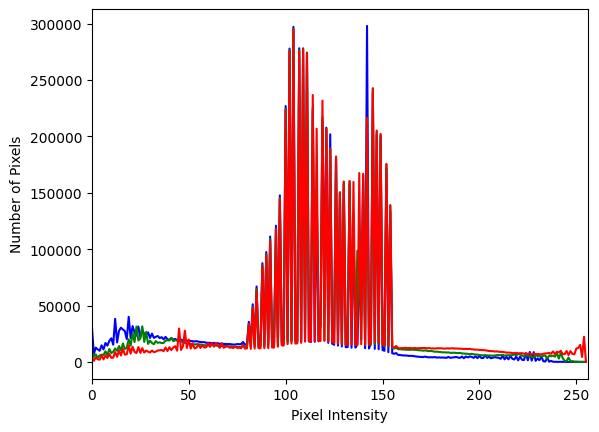

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 2 dimension(s)

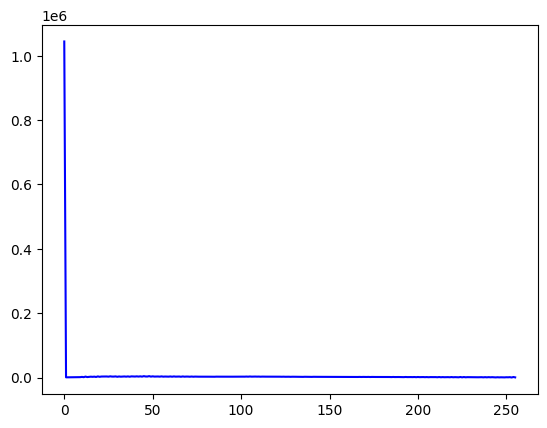

: 

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread('jeniffer.jpg')

def resize_im(img,scale):
    new_width = int(img.shape[1] * scale)
    new_height = int(img.shape[0] * scale)
    img=cv.resize(img, (new_width, new_height))
    return img

image=resize_im(img,0.25)
cv.imshow('original',image)
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)  # Convert the image to the HSV 
hue, saturation, value = cv.split(hsv_image)  # Split the HSV ro H,S,V

#choosing saturation plane to mask bcz there is foreground isolated clearly by intensity

threashold,t=cv.threshold(saturation,11,255,cv.THRESH_BINARY) 
masked=cv.bitwise_and(image,image,mask=t)
cv.imshow('masked', masked)
# cv.imshow('new1 ', t)


color = ('b', 'g', 'r')

for i, c in enumerate(color):              #enumerate is usedhere, so i =0,1,2   (it only give lenghth of array based on  number of elemnets) and c = each elemnt
    hist = cv.calcHist([img], [i], None, [256], [0, 255])
    plt.plot(hist, color=c)                     #plot the graph for need color

plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixels')
plt.xlim([0, 256])
plt.show()


b, g, r = cv.split(masked)
array=[b,g,r]
array_new=[]
for i, c in enumerate(color):              #enumerate is usedhere, so i =0,1,2   (it only give lenghth of array based on  number of elemnets) and c = each elemnt
    hist, bins = np.histogram(masked.ravel(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    plt.plot(hist, color=c)                     #plot the graph for need color
    equi = cv.equalizeHist(array[i])
    res = np.hstack((masked, equi))
    array_new.append(res)
    hist2, bins2 = np.histogram(equi.ravel(), 256, [0, 256])
    cdf2 = hist2.cumsum()
    cdf_normalized2 = cdf2 * hist2.max() / cdf2.max()
    plt.plot(hist2, color=c)  


# plt.xlabel('Pixel Intensity')
# plt.ylabel('Number of Pixels')
# plt.xlim([0, 256])
# plt.show()  








masked = cv.merge(array_new)

background = cv.bitwise_not(t)  # Invert the foreground mask to get the background


bagr=cv.bitwise_and(image, image, mask=background)
result = cv.add(masked, bagr)


cv.imshow('result', result)
cv.waitKey(0)
cv.destroyAllWindows()





plt.subplot(1,3, 1)
plt.imshow(hue, cmap='gray')
plt.title('Hue')
plt.subplot(1, 3, 2)
plt.imshow(saturation, cmap='gray')
plt.title('Saturation')
plt.subplot(1, 3, 3)
plt.imshow(value, cmap='gray')
plt.title('Value')
plt.tight_layout()
plt.show()


# Question 7

# Question 8

# Question 9  